<a href="https://colab.research.google.com/github/yesoly/MachineLearningProject/blob/master/Assignment05_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [355]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-02.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


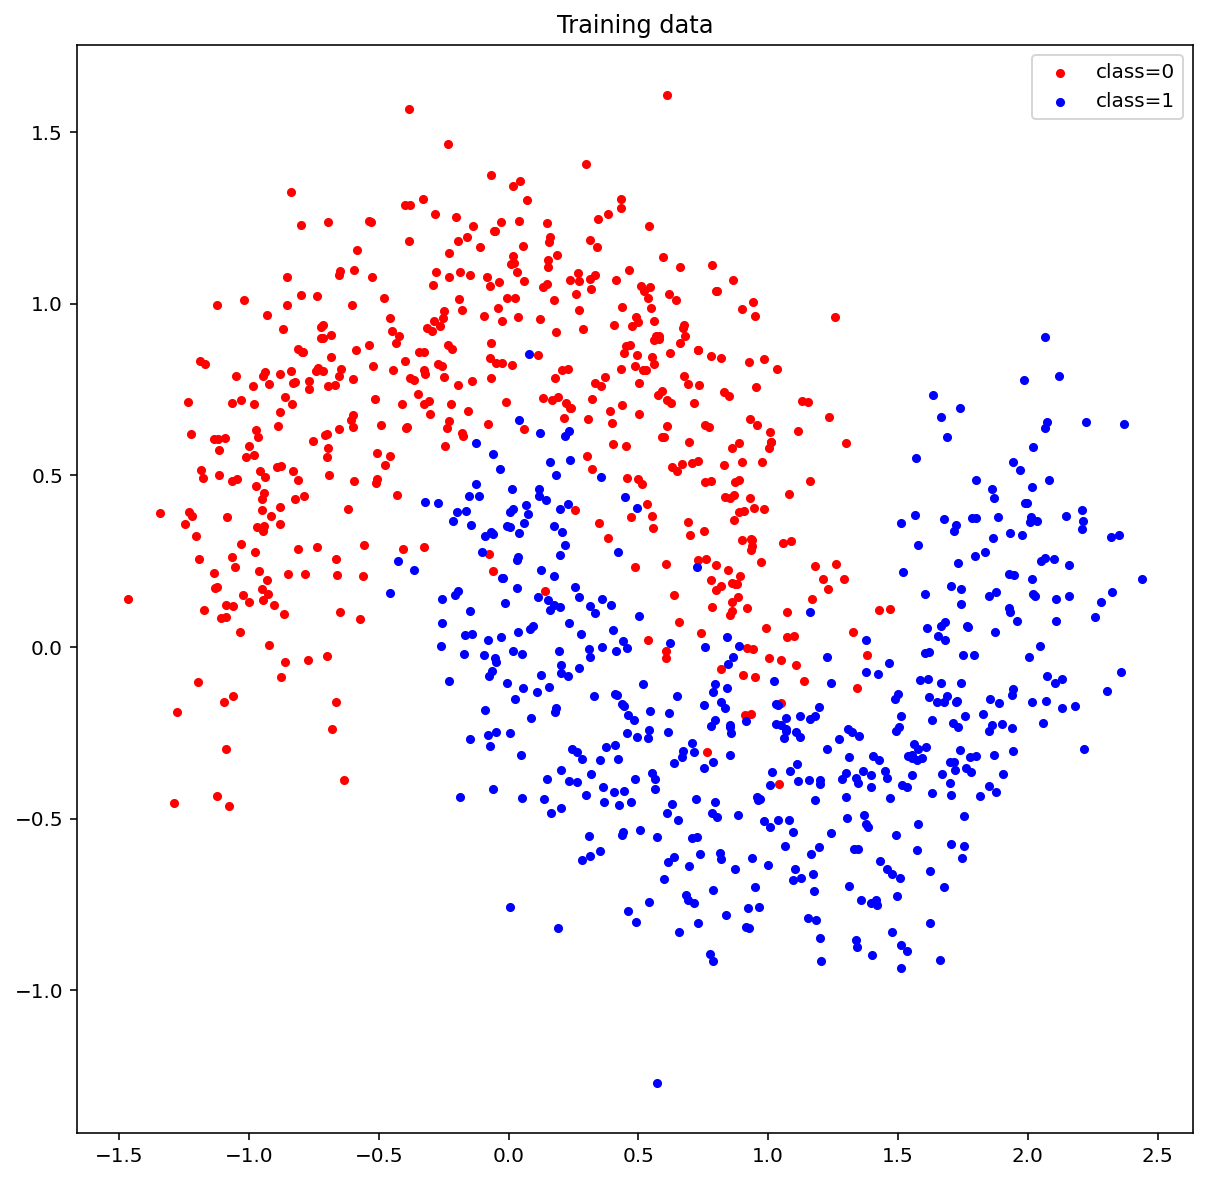

In [356]:
# import data with numpy
path = '/content/drive/My Drive/ML_Assignment/data/dataset-b.txt'
data = np.loadtxt(path, delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx == 0)# index of class0
idx_class1 = (idx == 1) # index of class1

fig_1 = plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()
fig_1.savefig('Visualize the data.png')

## 2. Define a logistic regression loss function and its gradient
<hr>

In [357]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1.0 / (1.0 + np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2 * np.dot(X.T, (y_pred - y)) / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):
    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function   
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

In [358]:
def feature_function(x1, x2):
  n = 9
  f_func = np.array([(x1**0)*(x2**0), n*(x1**1)*(x2**2), n*(x1**2)*(x2**1), n*(x1**3), n*(x2**3),
                    n*((x1**3)+(x2**3)), n*(x1**3)+(x2**3), (x1**3)+n*(x2**3), 3*n*(x1**2), 3*n*(x2**2)])

  return f_func.T

(1000, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Time= 3.5843892097473145
nan
[[ 2.71021697]
 [ 0.837196  ]
 [-0.60336122]
 [ 0.78356723]
 [-1.0693093 ]
 [-0.28574207]
 [ 0.66475509]
 [-0.98224627]
 [-0.50326756]
 [ 0.20288312]]


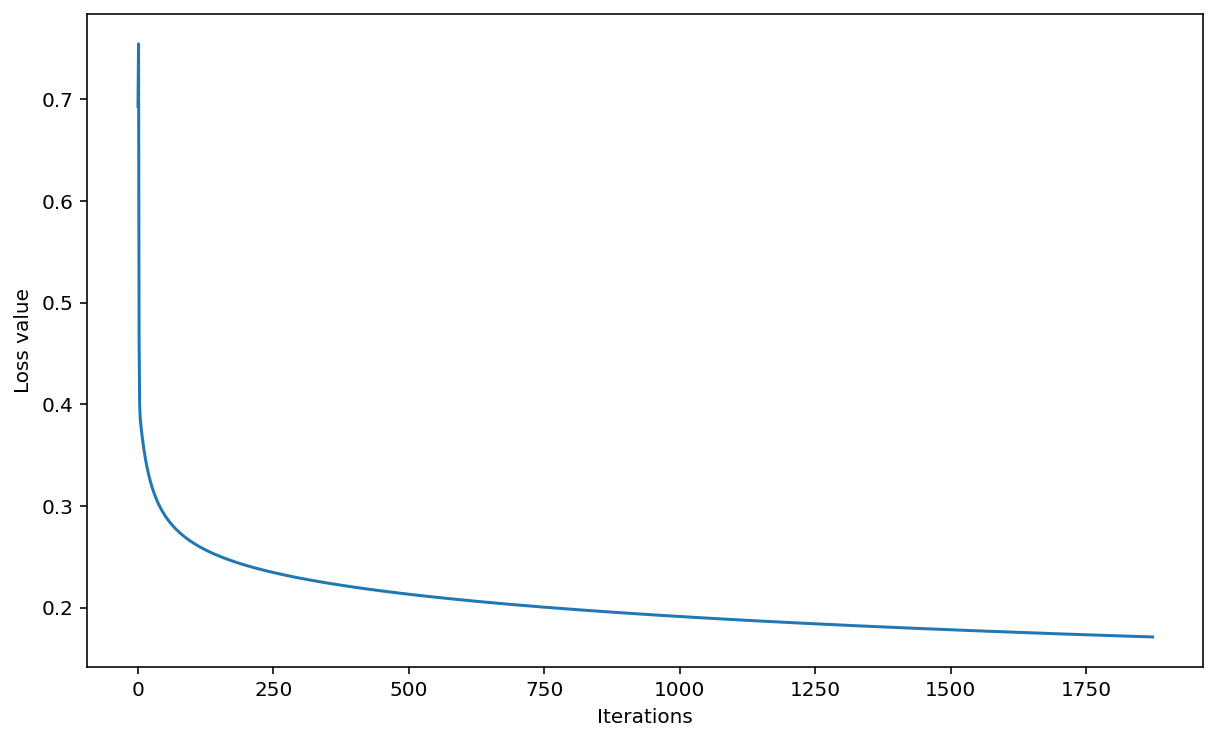

In [359]:
# construct the data matrix X, and label vector y
n = data.shape[0]
X = feature_function(x1, x2)
y = data[:,2][:,None] # label 
print(y.shape)


# run gradient descent algorithm
start = time.time()
w_init = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])[:,None]
tau = 0.005; max_iter = 15000
w, L_iters = grad_desc(X, y , w_init, tau, max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
fig_2 = plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()
fig_2.savefig('Plot the loss curve.png')

## 4. Plot the decisoin boundary
<hr>

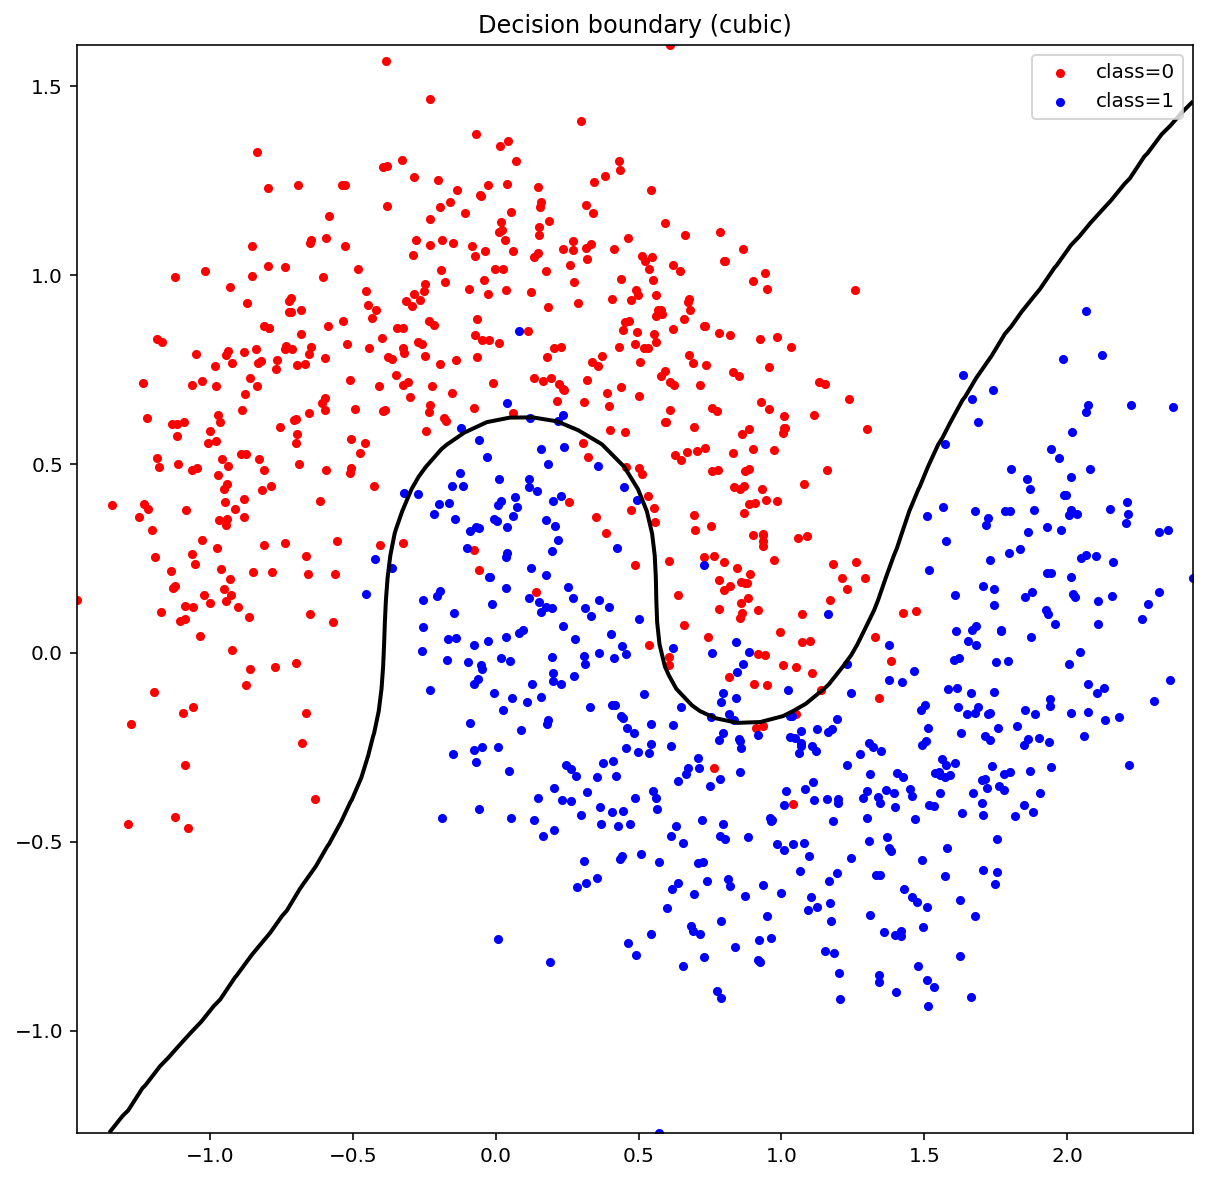

In [360]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = feature_function(xx1.reshape(-1), xx2.reshape(-1))

p = f_pred(X2,w)
p = p.reshape(50,50)

# plot
fig_3 = plt.figure(4,figsize=(10,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend(loc = 'upper right')
plt.title('Decision boundary (cubic)')
plt.show()
fig_3.savefig('Plot the decisoin boundary.png')

## 5. Plot the probability map
<hr>

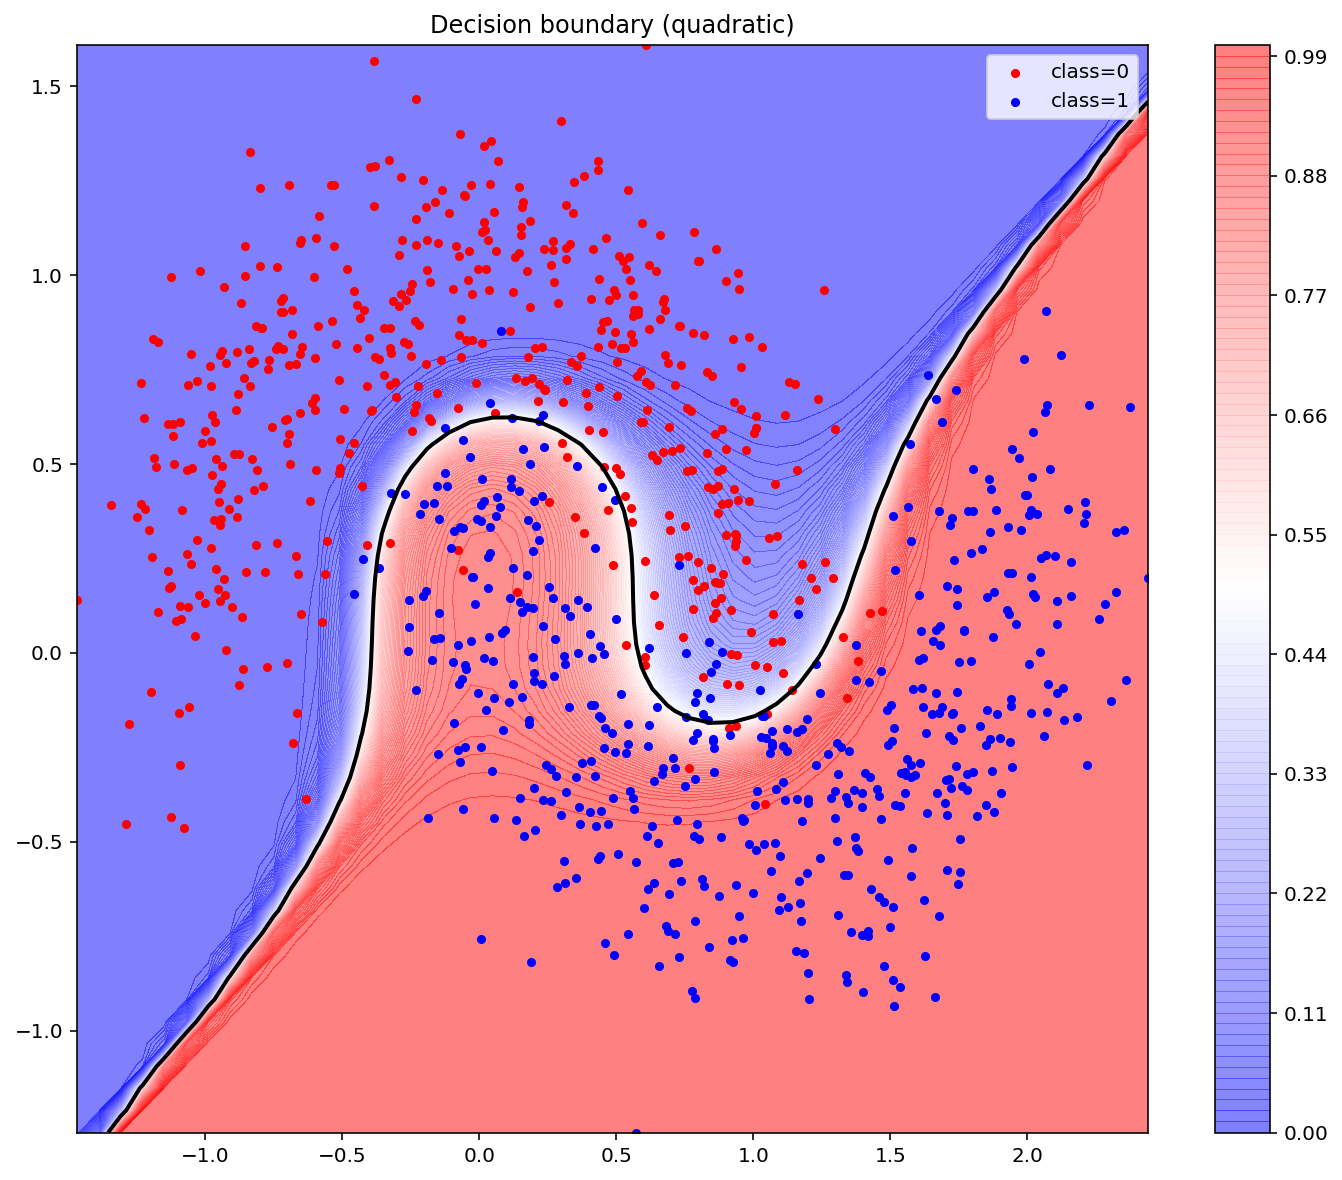

In [361]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = feature_function(xx1.reshape(-1), xx2.reshape(-1))

p = f_pred(X2,w)
p = p.reshape(50,50)

# plot
fig_4 = plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1, xx2, p, 100, cmap = 'bwr', vmin = 0, vmax = 1, alpha = 0.5)
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend(loc = 'upper right')
plt.title('Decision boundary (quadratic)')
plt.show()
fig_4.savefig('Plot the probability map.png')

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [362]:
# compute the accuracy of the classifier
n = data.shape[0]
print('total number of data = ', n)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (idx == 0)# index of class0
idx_class1 = (idx == 1) # index of class1

X2 = feature_function(x1, x2)
p = f_pred(X2,w)

idx_class0_pred = (p < 0.5)

idx_right = (idx_class0 == idx_class0_pred.reshape(-1))

print('total number of correctly classified data = ', sum(idx_right))
print('accuracy(%) = ', sum(idx_right)/n * 100)

total number of data =  1000
total number of correctly classified data =  954
accuracy(%) =  95.39999999999999


## Output using the dataset (dataset-noise-02.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

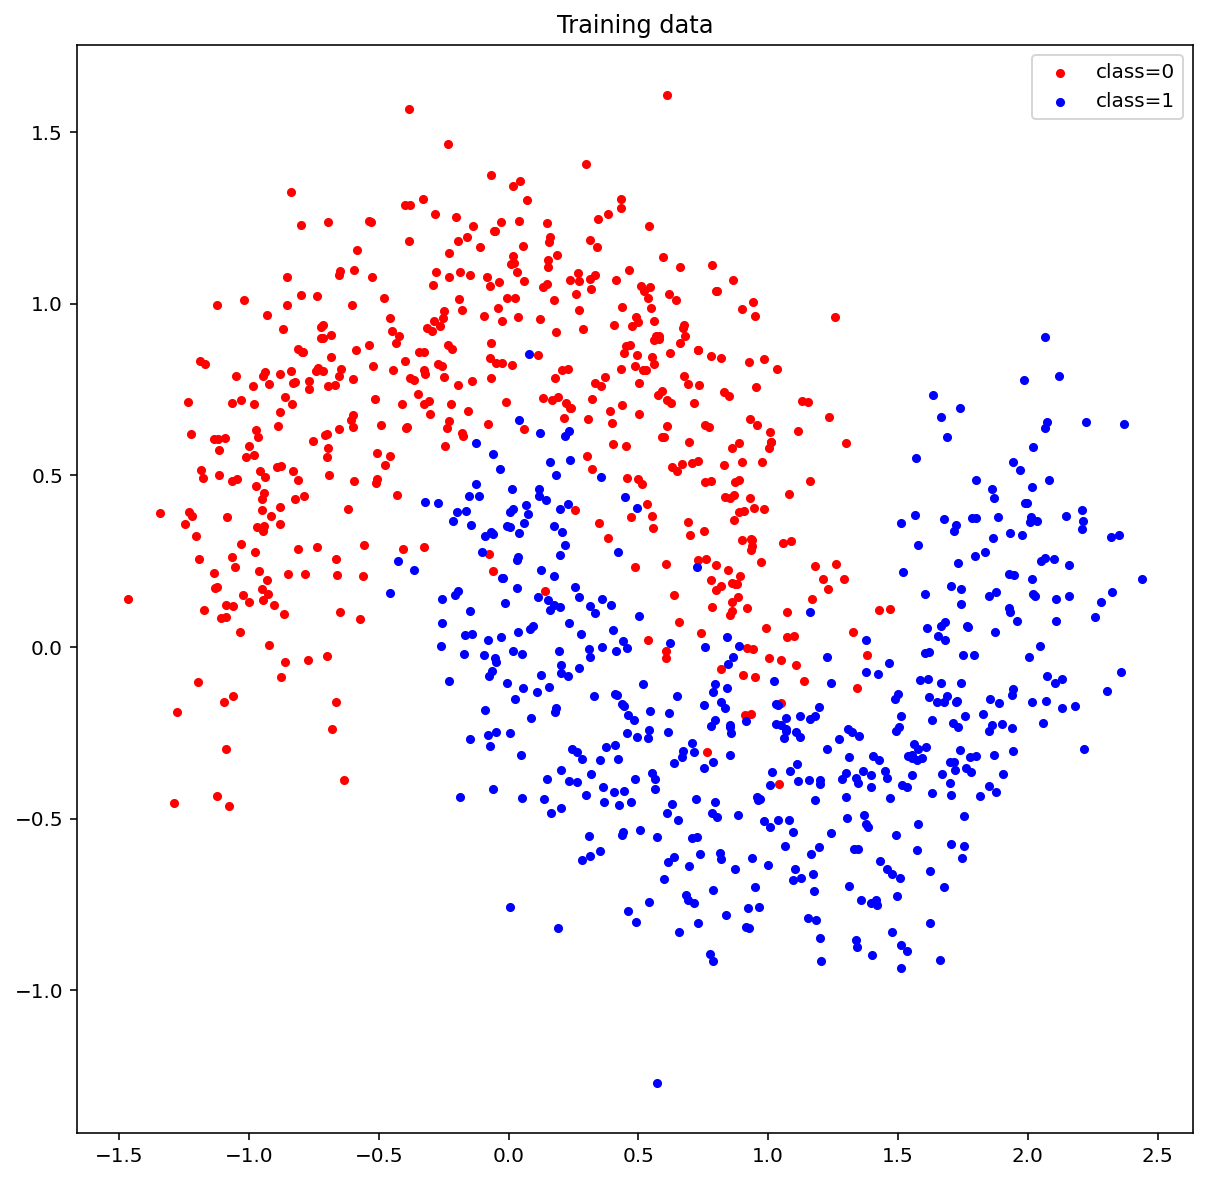

In [363]:
fig_1

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

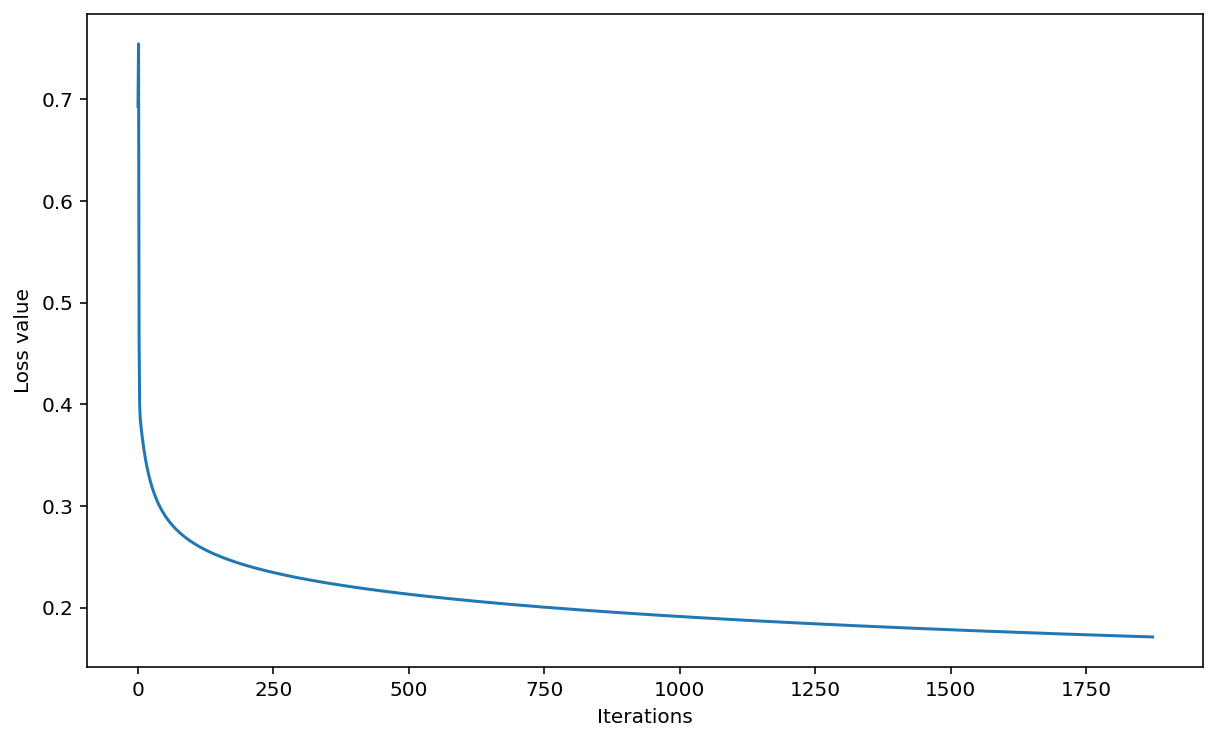

In [364]:
fig_2

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

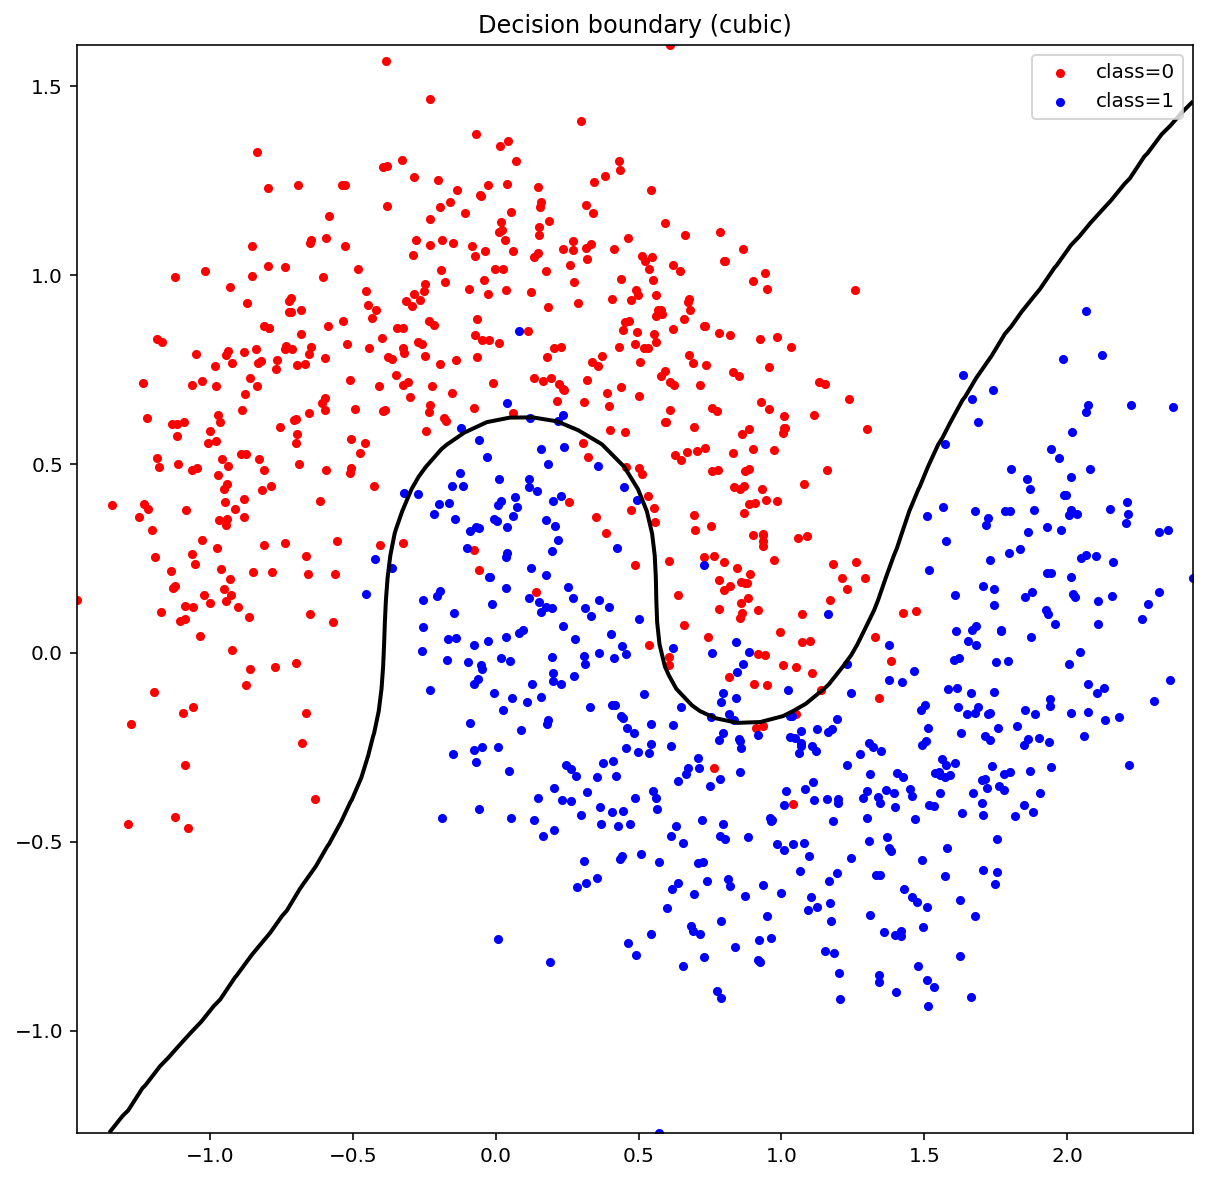

In [365]:
fig_3

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

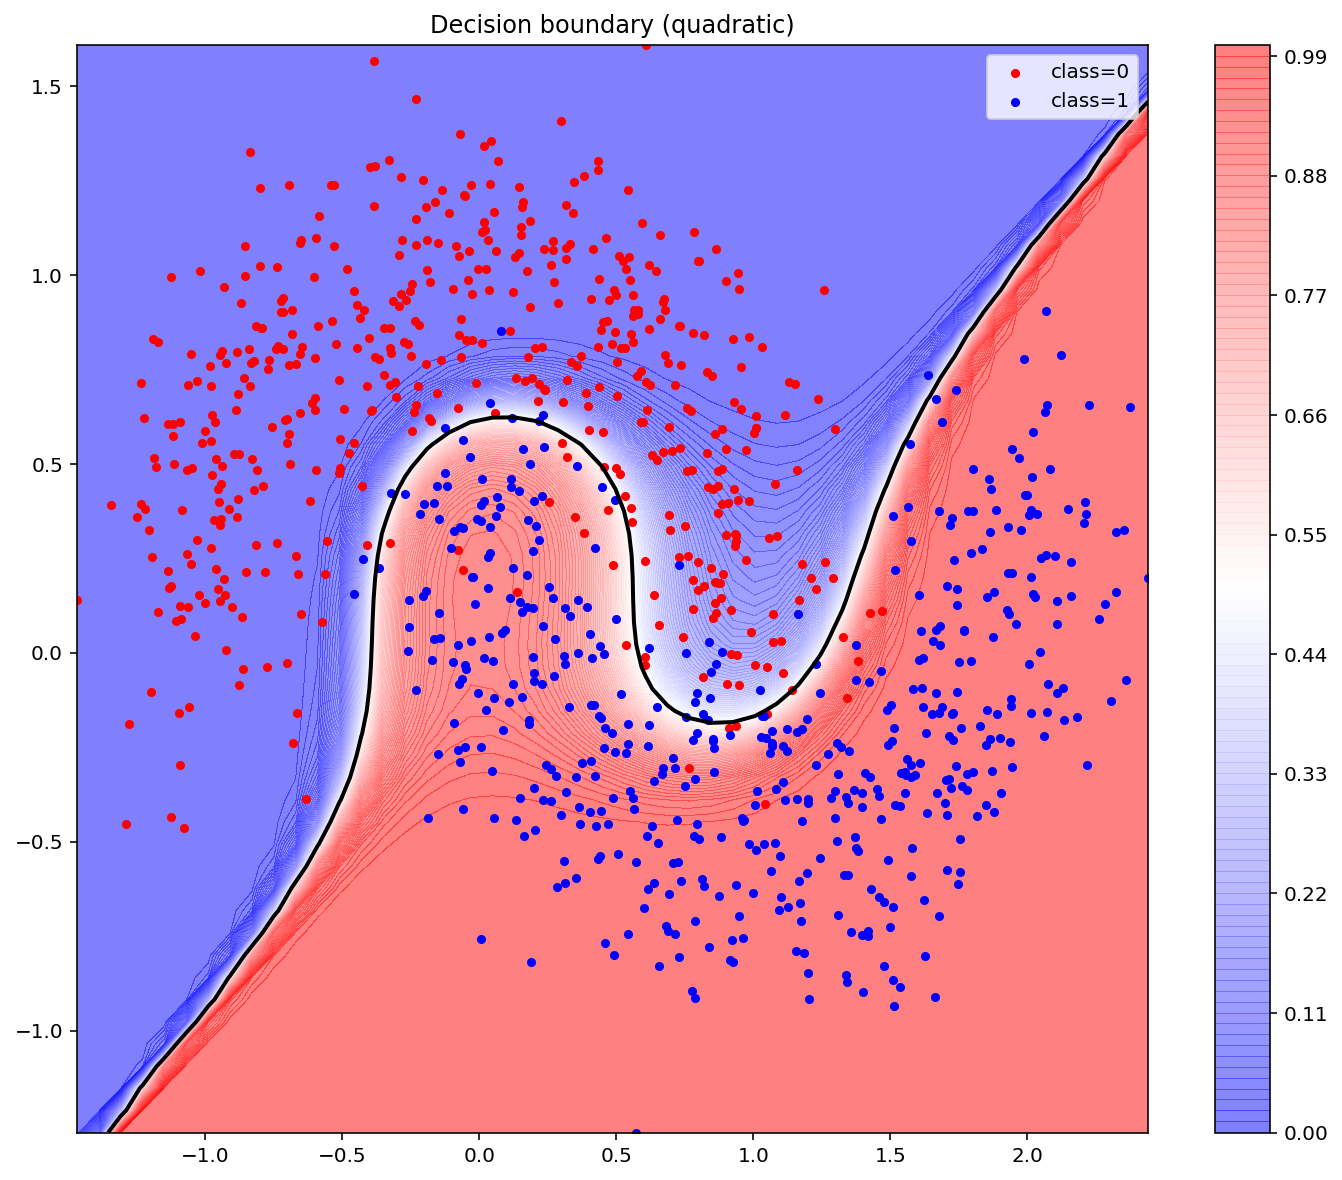

In [367]:
fig_4

## 5. Compute the classification accuracy [1pt]
<hr>

In [368]:
print('total number of data = ', n)
print('total number of correctly classified data = ', sum(idx_right))
print('accuracy(%) = ', sum(idx_right) / n * 100)

total number of data =  1000
total number of correctly classified data =  954
accuracy(%) =  95.39999999999999
